### Exhaustive feature selection

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d.

In an exhaustive feature selection the best subset of features is selected, over all possible feature subsets, by optimizing a specified performance metric for a certain machine learning algorithm. For example, if the classifier is a logistic regression and the dataset consists of 4 features, the algorithm will evaluate all **15** feature combinations as follows:

- all possible combinations of 1 feature
- all possible combinations of 2 features
- all possible combinations of 3 features
- all the 4 features

and select the one that results in the best performance (e.g., classification accuracy) of the logistic regression classifier.

This is another greedy algorithm as it evaluates all possible feature combinations. It is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

There is a special package for python that implements this type of feature selection: mlxtend.

In the mlxtend implementation of the exhaustive feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features. 

This is somewhat arbitrary because we may be selecting a subopimal number of features, or likewise, a high number of features. 

Here I will use the Exhaustive feature selection algorithm from mlxtend in a classification (Paribas) and regression (House Price) dataset.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [2]:
# Read the csv file
df = pd.read_csv("data/diagnosis.csv")
df.head()

,ID number,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave Points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave Points worst,Symmetry worst,Fractal Dimension worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [3]:
df.columns

Index(['ID number', 'Diagnosis', 'Radius mean', 'Texture mean',
       'Perimeter mean', 'Area mean', 'Smoothness mean', 'Compactness mean',
       'Concavity mean', 'Concave Points mean', 'Symmetry mean',
       'Fractal Dimension mean', 'Radius SE', 'Texture SE', 'Perimeter SE',
       'Area SE', 'Smoothness SE', 'Compactness SE', 'Concavity SE',
       'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE',
       'Radius worst', 'Texture worst', 'Perimeter worst', 'Area worst',
       'Smoothness worst', 'Compactness worst', 'Concavity worst',
       'Concave Points worst', 'Symmetry worst', 'Fractal Dimension worst'],
      dtype='object')

In [7]:
# Prepare target data
target = df["Diagnosis"]
target_names = ["malignant", "benigh"]
target = target.map({'M': 1, 'B': 0})
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [13]:
# Prepare feature data
data = df.drop(["ID number", "Diagnosis"], axis=1)
feature_names = data.columns
data.head()

,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave Points mean,Symmetry mean,Fractal Dimension mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave Points worst,Symmetry worst,Fractal Dimension worst
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [14]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(568, 30)

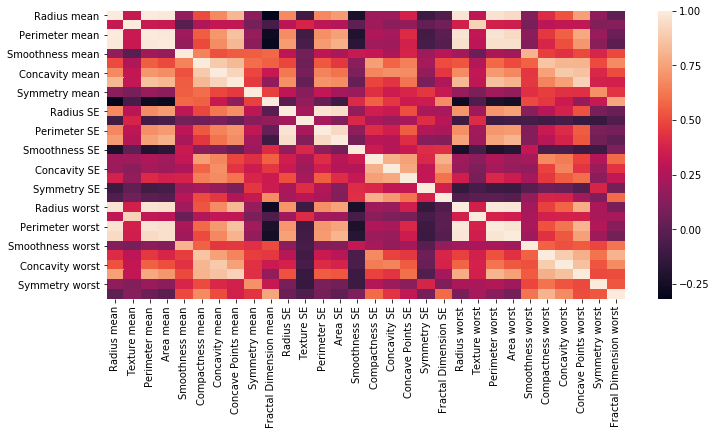

In [15]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
sns.heatmap(corr)

In [16]:
# Use train_test_split to create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [17]:
X_train.shape, X_test.shape

((426, 30), (142, 30))

In [18]:
# I keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

### Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [19]:
# find and remove correlated features
# in order to reduce the feature space a bit
# so that the algorithm takes shorter

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  16


In [20]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


((426, 14), (142, 14))

In [21]:
X_train.columns[0:10]

Index(['Radius mean', 'Texture mean', 'Smoothness mean', 'Compactness mean',
       'Symmetry mean', 'Fractal Dimension mean', 'Radius SE', 'Texture SE',
       'Smoothness SE', 'Compactness SE'],
      dtype='object')

In [22]:
# exhaustive feature selection
# I indicate that I want to select 10 features from
# the total, and that I want to select those features
# based on the optimal roc_auc

# in order to shorter search time for the demonstration
# i will ask the algorithm to try all possible 1,2,3 and 4
# feature combinations from a dataset of 4 features

# if you have access to a multicore or distributed computer
# system you can try more greedy searches

efs1 = EFS(RandomForestClassifier(n_jobs=4, random_state=0), 
           min_features=1,
           max_features=4, 
           scoring='roc_auc',
           print_progress=True,
           cv=2)

efs1 = efs1.fit(np.array(X_train[X_train.columns[0:4]].fillna(0)), y_train)

Features: 15/15

In [23]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [24]:
efs1.best_idx_

(0, 1, 2, 3)

In [25]:
selected_feat= X_train.columns[list(efs1.best_idx_)]
selected_feat

Index(['Radius mean', 'Texture mean', 'Smoothness mean', 'Compactness mean'], dtype='object')

In [26]:
# evaluate performance of classifier using selected features

run_randomForests(X_train[selected_feat].fillna(0),
                  X_test[selected_feat].fillna(0),
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9979582146248812
Test set
Random Forests roc-auc: 0.9605015673981191


This exhaustive search is very computationally expensive. Unless you have access to a multicore or distributed computer system I don't see how you can get the most out of it. In practice for this computational cost, I have not used this search algorithm.

That is all for this lecture, see you in the next one!

In [27]:
new1 = df[selected_feat]
selected_diagnosis_4 = pd.concat([new1, df["Diagnosis"]], axis=1)
selected_diagnosis_4.to_csv("selected_diagnosis_6.csv", index=False)